### Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Нормализация [0, 1]

In [4]:
X[1].min(), X[1].max()

(0, 10)

In [5]:
X[2].min(), X[2].max()

(450, 2000)

In [6]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 5.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [7]:
X_norm[1] = (X[1] - X[1].min()) / (X[1].max() - X[1].min())
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e-01, 1.00e-01, 2.00e-01, 5.00e-01, 3.00e-01, 0.00e+00,
        5.00e-01, 1.00e+00, 1.00e-01, 2.00e-01],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [8]:
X_norm[2] = (X[2] - X[2].min()) / (X[2].max() - X[2].min())
X_norm

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.1       , 0.1       , 0.2       , 0.5       , 0.3       ,
        0.        , 0.5       , 1.        , 0.1       , 0.2       ],
       [0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
        0.22580645, 0.67741935, 1.        , 0.        , 0.35483871],
       [1.        , 1.        , 2.        , 1.        , 2.        ,
        1.        , 3.        , 3.        , 1.        , 2.        ]])

Стандартизация

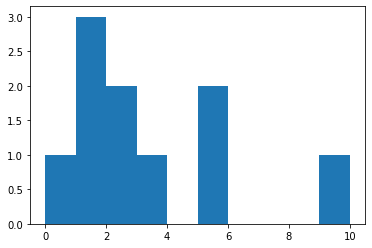

In [9]:
plt.hist(X[1])
plt.show()

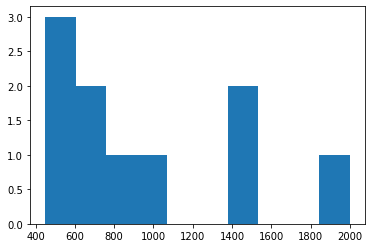

In [10]:
plt.hist(X[2])
plt.show()

In [11]:
X_st = X.copy().astype(np.float64)
X1_mean = X[1].mean()
X1_std = X[1].std()
print(X1_mean, X1_std)

3.0 2.8284271247461903


In [12]:
X_st[1] = (X[1] - X1_mean) / X1_std
X_st

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00],
       [-7.07106781e-01, -7.07106781e-01, -3.53553391e-01,
         7.07106781e-01,  0.00000000e+00, -1.06066017e+00,
         7.07106781e-01,  2.47487373e+00, -7.07106781e-01,
        -3.53553391e-01],
       [ 5.00000000e+02,  7.00000000e+02,  7.50000000e+02,
         6.00000000e+02,  1.45000000e+03,  8.00000000e+02,
         1.50000000e+03,  2.00000000e+03,  4.50000000e+02,
         1.00000000e+03],
       [ 1.00000000e+00,  1.00000000e+00,  2.00000000e+00,
         1.00000000e+00,  2.00000000e+00,  1.00000000e+00,
         3.00000000e+00,  3.00000000e+00,  1.00000000e+00,
         2.00000000e+00]])

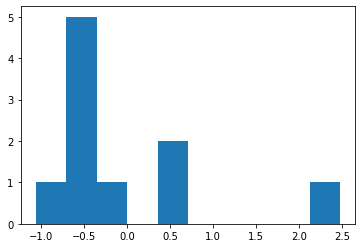

In [13]:
plt.hist(X_st[1])
plt.show()

In [14]:
def calc_std_fit(x):
    res = (x - x.mean()) / x.std()
    return res

In [15]:
sklern.StandartScaler() #Стандартизайия
sklern.MinMaxScaler() #Нормализация

NameError: name 'sklern' is not defined

In [18]:
X_st[2] = calc_std_fit(X[2])

In [19]:
X_st[3] = calc_std_fit(X[3])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.70710678, -0.70710678, -0.35355339,  0.70710678,  0.        ,
        -1.06066017,  0.70710678,  2.47487373, -0.70710678, -0.35355339],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

SGD (Stochastic gradient descent)

In [20]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [21]:
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [22]:
eval_model(X_st, y, iterations=1000, alpha=1e-2)

100 [49.06444454  4.98917467  2.35458038  4.99965849] 83.83902663038869
200 [55.51389994  5.45162797  1.80304122  5.17393675] 26.724772988309645
300 [56.36922385  5.72288512  1.36822381  5.36043898] 25.428917300744278
400 [56.48265652  5.89293248  1.02972988  5.54461626] 25.23229720625498
500 [56.49769992  6.00340123  0.76264238  5.71252725] 25.119357060362915
600 [56.49969496  6.07791905  0.54980066  5.85921196] 25.046455386016902
700 [56.49995955  6.13009222  0.37899157  5.98419742] 24.998609036273024
800 [56.49999464  6.16789225  0.24123943  6.0890684 ] 24.966995952528244
900 [56.49999929  6.19609555  0.12976833  6.17620402] 24.94604415756291
1000 [5.64999999e+01 6.21764568e+00 3.93532305e-02 6.24814363e+00] 24.932138505538262


array([5.64999999e+01, 6.21764568e+00, 3.93532305e-02, 6.24814363e+00])

In [23]:
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    
    if n % qty_in_batch != 0:
        n_batch += 1
        
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
#             print(b, n_batch, start_, end_)
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]

            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)

            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))
        
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [24]:
eval_sgd_model(X_st, y, iterations=50000, qty_in_batch=4, alpha=1e-2)

5000 [56.5106203   6.31268984 -0.36443244  6.58449451] 11.289390310967118
10000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289182006891313
15000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330403
20000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330424
25000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330424
30000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330424
35000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330424
40000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330424
45000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330424
50000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330424


array([56.51062035,  6.31272262, -0.3645908 ,  6.58462533])

L1 регуляризация

L2 регуляризация

In [25]:
# lambda = lambda_/2

In [26]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
#         if i % (iterations / 10) == 0:
#             print(i, W, err)
    return W

In [27]:
W = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

In [28]:
W

array([56.49717514,  6.30231751, -0.35424091,  6.56978425])

In [29]:
eval_model(X_st, y, iterations=5000, alpha=1e-2)

500 [56.49767254  5.83477719  1.36781865  5.25424451] 25.41382962551478
1000 [56.4999999   6.17124081  0.25269258  6.07416416] 24.96978439147539
1500 [56.5         6.2575128  -0.13774522  6.39128671] 24.913059475565504
2000 [56.5         6.28678323 -0.27772011  6.50655795] 24.905712417850072
2500 [56.5         6.29722767 -0.32807425  6.54810646] 24.9047605537917
3000 [56.5         6.30098239 -0.34619733  6.56306445] 24.904637232271703
3500 [56.5         6.30233363 -0.3527205   6.5684486 ] 24.904621254991206
4000 [56.5         6.30281999 -0.35506846  6.57038658] 24.904619185007856
4500 [56.5         6.30299505 -0.35591359  6.57108415] 24.904618916825118
5000 [56.5         6.30305806 -0.35621778  6.57133523] 24.90461888207991


array([56.5       ,  6.30305806, -0.35621778,  6.57133523])

## Д/з

* Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока). Сделайте вывод

* Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

* Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.